In [1]:
import numpy as np
import tensorflow as tf
print("Tensorflow version", tf.__version__)

Tensorflow version 2.6.0


In [2]:
from tensorflow import keras
print("keras version", keras)

keras version <module 'keras.api._v2.keras' from '/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/api/_v2/keras/__init__.py'>


In [3]:
import matplotlib.pyplot as plt
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
fashion_mnist= keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()
X_train_full.shape   #xtrain-training set; ytrain-lebels

(60000, 28, 28)

In [26]:
#splitting training set into validation set
X_valid=X_train_full[:5000]/255   #Slice the first 5000 samples from the X_train_full and divide the values by 255. to scale the image pixel values to be in the range 0-1. Store these first 5000 scaled samples in X_valid.
y_valid=y_train_full[:5000]   
X_train=X_train_full[5000:]/255
y_train=y_train_full[5000:]
print("Train data shape:",X_train.shape)
print("Validation data shape:",X_train)
print("Test data shape:",y_train)
X_test=X_test/ 255

In [6]:
X_test.max()

1.0

Class label is: 4
Class name is: Coat


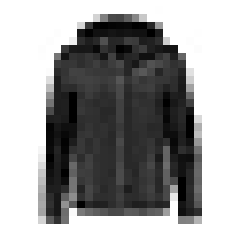

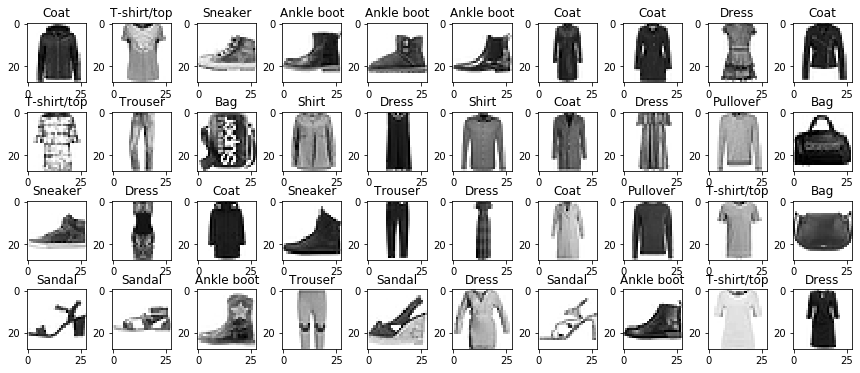

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
       "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print("Class label is:", y_train[0])
print("Class name is:", class_names[y_train[0]])
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()
n_rows = 4
n_cols = 10
plt.figure(figsize=(15, 6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)  #make 40 subplot box
        plt.imshow(X_train[index],cmap="binary")  #fill in the images in the subplot
        plt.axis('on')   #only "on" or "off"
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [8]:
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [10]:
model.layers

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


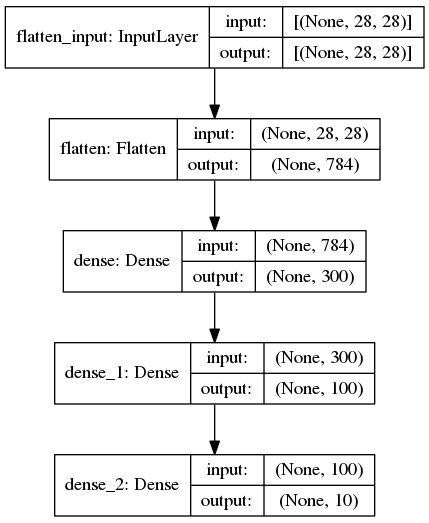

In [12]:
keras.utils.plot_model(model,"my_fashion_mnist_model.png",show_shapes=True)

In [13]:
sgd=keras.optimizers.SGD(learning_rate=0.01)

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
        optimizer=sgd,
        metrics=["accuracy"])

In [15]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4349 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4392 - accuracy: 0.8455 - val_loss: 0.5386 - val_accuracy: 0.7966
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4125 - accuracy: 0.8564 - val_loss: 0.3918 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3941 - accuracy: 0.8619 - val_loss: 0.3753 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3754 - accuracy: 0.8675 - val_loss: 0.3700 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3635 - accuracy: 0.8712 - val_loss: 0.3621 - val_accuracy:

In [16]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [17]:
hidden1 = model.layers[1]
print(hidden1.name)

dense


In [18]:
weights, biases = hidden1.get_weights() # getting the weights and biases
print(weights.shape, weights)
print(biases)

(784, 300) [[ 0.02428285 -0.00886469 -0.02189048 ... -0.0277466   0.03859093
  -0.06890567]
 [ 0.00458167 -0.03111238 -0.0586676  ...  0.0059311  -0.02763377
  -0.04164384]
 [-0.06294356 -0.0692431   0.07103892 ... -0.04246701  0.07121241
  -0.07312134]
 ...
 [-0.01680814  0.0211033  -0.05389142 ...  0.00072547  0.00047075
   0.06282523]
 [ 0.07304996 -0.0706187   0.07045519 ... -0.00088753 -0.00160943
   0.03134048]
 [-0.06218424  0.01550852 -0.0258508  ... -0.00459032  0.00223509
  -0.06747545]]
[ 1.84317201e-01  4.19703461e-02 -7.65934819e-04 -1.00130469e-01
  1.03672612e-02  9.32470411e-02  5.11804186e-02 -6.01240015e-03
 -2.29190234e-02  6.83829933e-02 -8.94708373e-03 -1.53277814e-02
  9.30579305e-02  2.76974915e-03  1.76828712e-01  9.65783522e-02
 -3.76166888e-02  7.25023448e-02  1.02750160e-01 -1.30884752e-01
  1.18477479e-01  1.43106356e-01  4.91152238e-03  3.58829610e-02
  5.57398722e-02  5.30311875e-02 -5.98867889e-03  2.13155016e-01
  1.64704740e-01  1.30044837e-02  1.122479

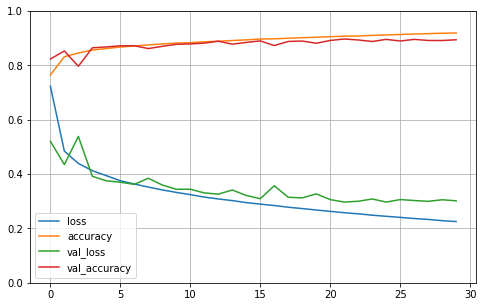

In [19]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3359 - accuracy: 0.8824


[0.33594074845314026, 0.8823999762535095]

In [24]:
y_pred = np.argmax(model.predict(X_test[:3]), 1)
print(y_pred)
print([class_names[index] for index in y_pred])

[9 2 1]
['Ankle boot', 'Pullover', 'Trouser']


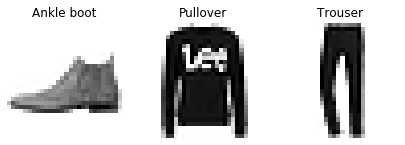

In [25]:
plt.figure(figsize=(7, 3))

for index, image in enumerate(X_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()
